In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
data.isnull().any()

Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Petal.Width     False
Species         False
dtype: bool

In [3]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [4]:
data_copy = data.copy(deep = True)
data_copy[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']] = data_copy[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].replace(0,np.NaN)
data_copy.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

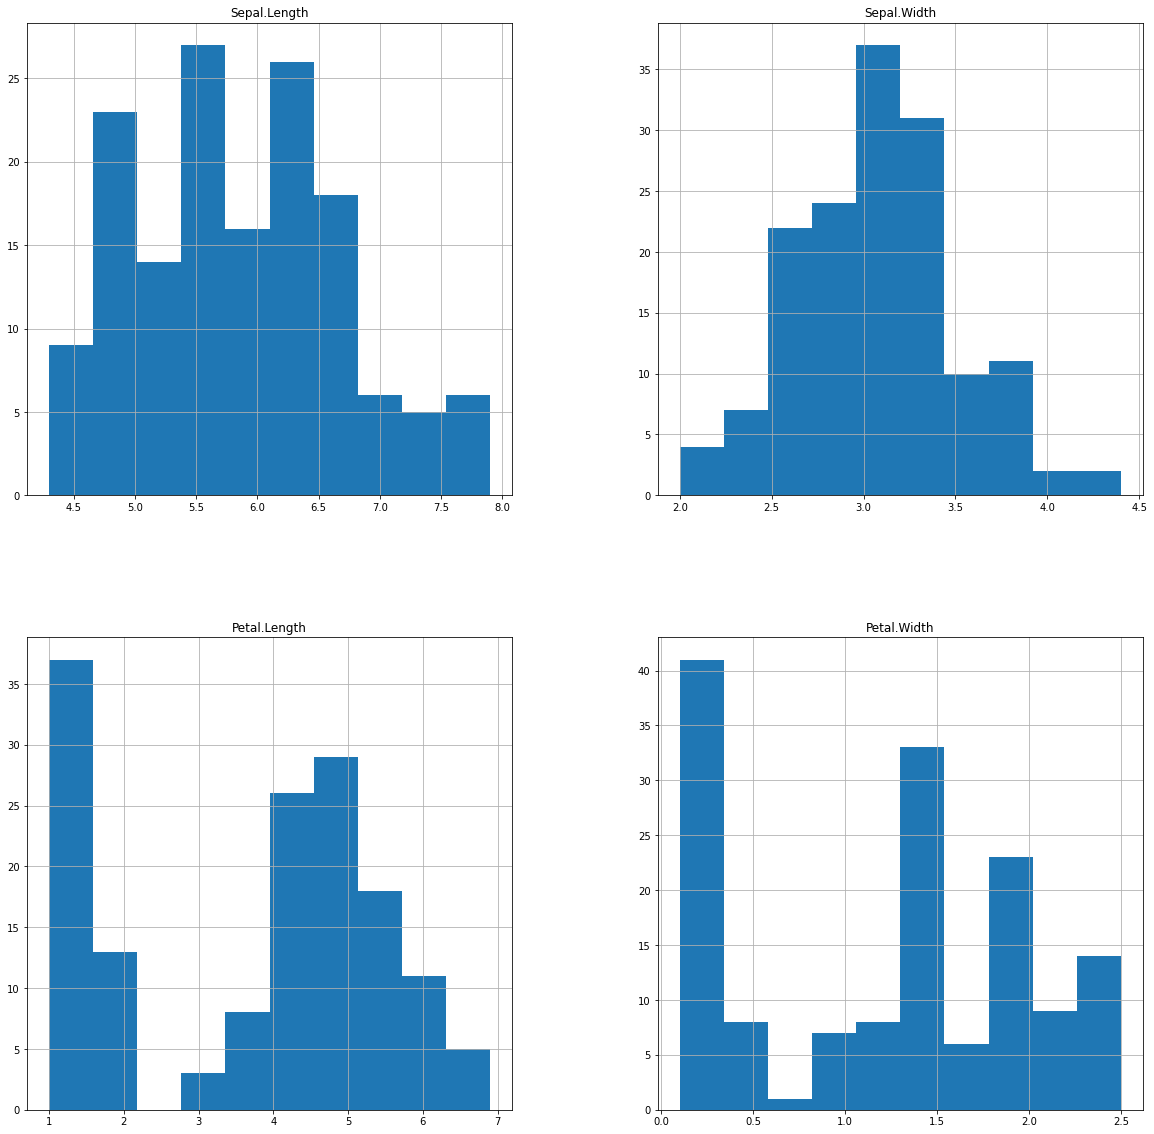

In [5]:
p = data.hist(figsize = (20,20))

In [6]:
data_copy['Sepal.Length'].fillna(data_copy['Sepal.Length'].mean(), inplace = True)
data_copy['Sepal.Width'].fillna(data_copy['Sepal.Width'].mean(), inplace = True)
data_copy['Petal.Length'].fillna(data_copy['Petal.Length'].median(), inplace = True)
data_copy['Petal.Width'].fillna(data_copy['Petal.Width'].median(), inplace = True)

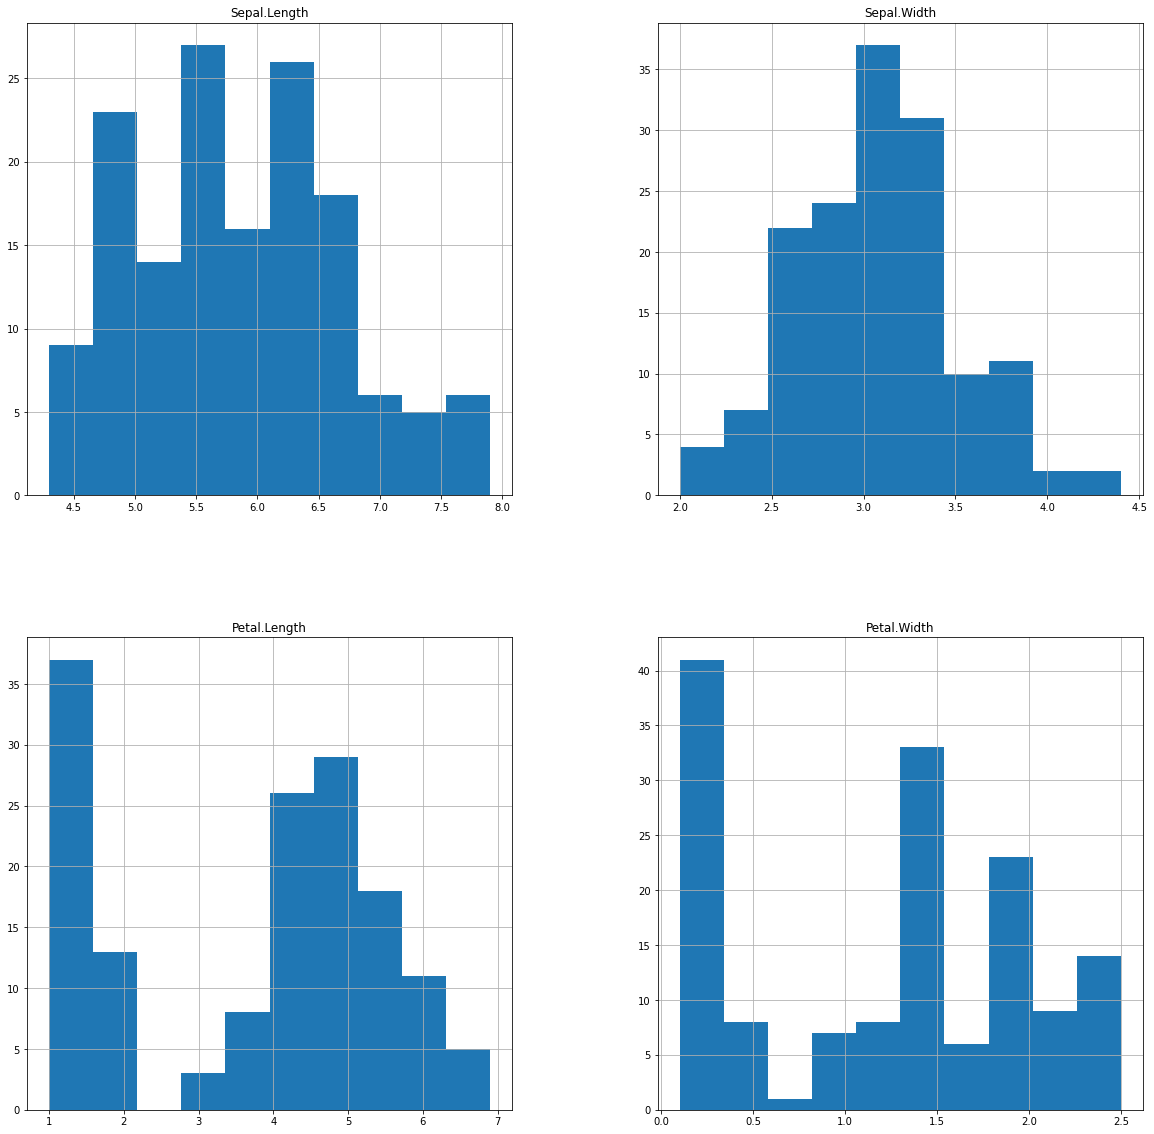

In [7]:
p = data_copy.hist(figsize = (20,20))

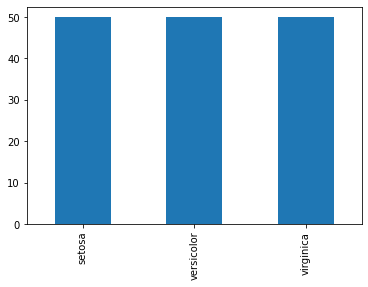

In [11]:
p=data.Species.value_counts().plot(kind="bar")

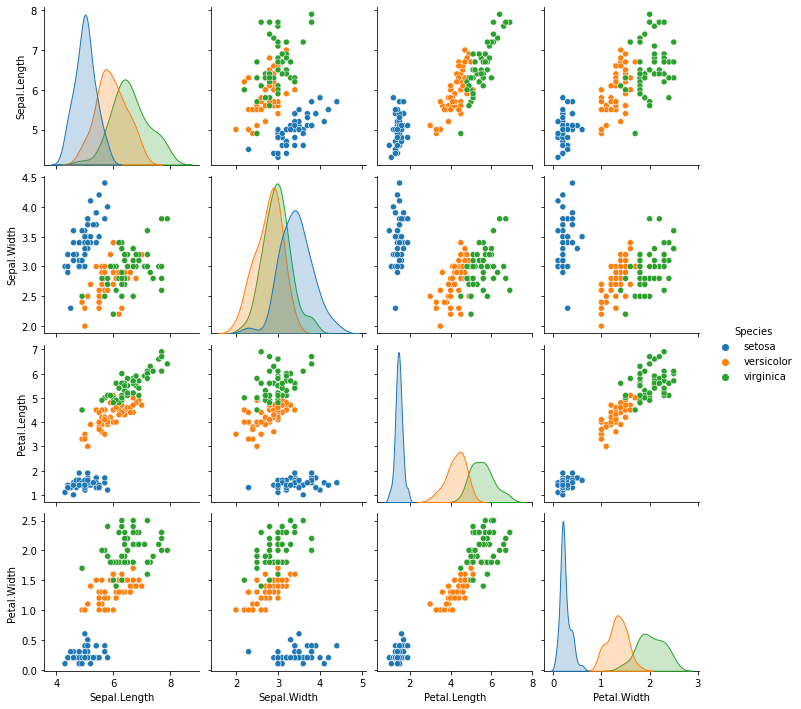

In [12]:
import seaborn as sns
p=sns.pairplot(data_copy, hue = 'Species')

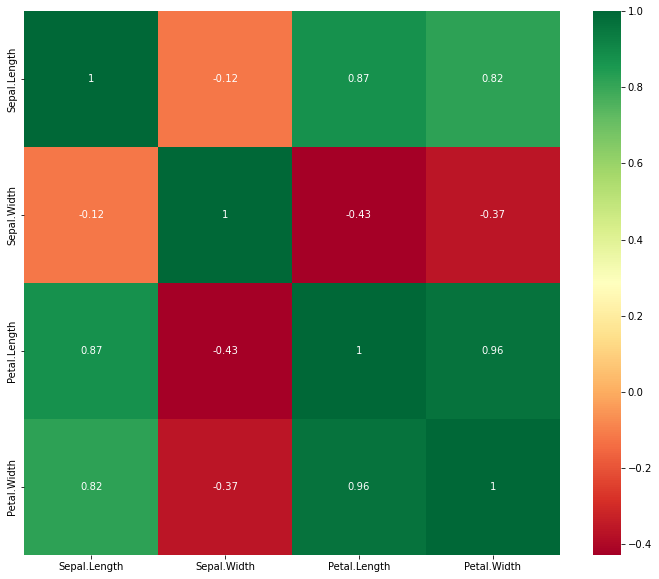

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))  
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  

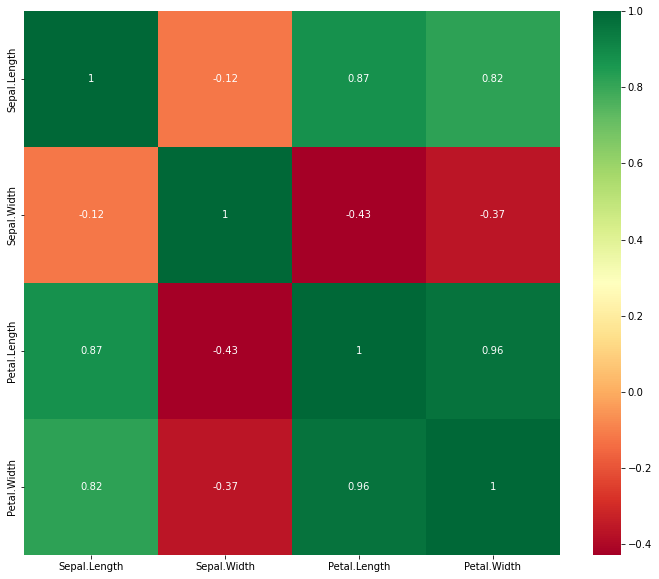

In [14]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn') 

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Species"], axis =1),),columns=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])

In [16]:
X.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [18]:
y =data_copy.Species
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42, stratify=y)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    max_test_score =max(test_scores)
test_score_index = [i for i, v in enumerate(test_scores) if v== max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 96.0 % and k = [7, 9, 10, 11, 13, 14]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


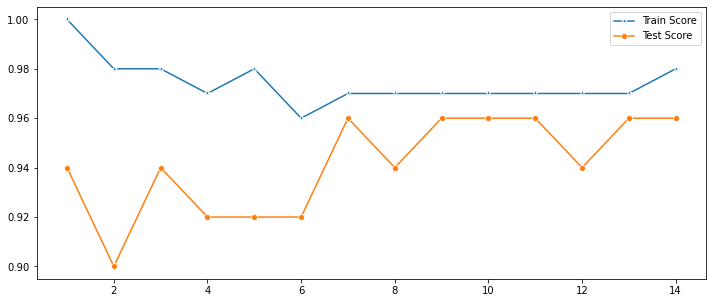

In [21]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [22]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.96

Text(0.5, 15.0, 'Predicted label')

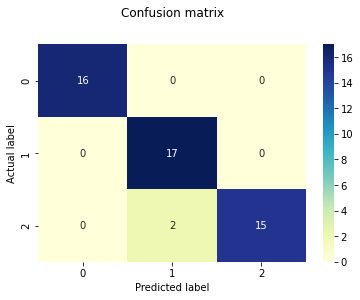

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.89      1.00      0.94        17
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

